In [2]:
import pandas as pd

In [66]:
betdataset=pd.read_parquet('../data/processed/nuevacolumna_betdataset.parquet')

In [67]:
betdataset.columns

Index(['Id', 'GameID', 'Username', 'Bet', 'CashedOut', 'Bonus', 'Profit',
       'BustedAt', 'PlayDate', 'Result'],
      dtype='object')

In [68]:
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,1
1,10676217,3343882,znay22,3,0.00,0.000,-3.00,1.40,2016-11-14 14:21:50+00:00,0
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,1
3,25732127,3429241,sanya1206,10,0.00,0.000,-10.00,1.63,2016-12-08 18:13:55+00:00,0
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,1
...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,0.00,0.000,-4.00,4.80,2016-12-02 05:00:57+00:00,0
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,1
49997,19704592,3398419,Ferreck,1,0.00,0.000,-1.00,1.06,2016-11-29 23:48:11+00:00,0
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,1


In [69]:
suma_positivos = betdataset[betdataset['Profit'] > 0]['Profit'].sum()
suma_positivos

np.float64(44100139.26999999)

In [7]:
betdataset[betdataset['Profit'] > 0]

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,1
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,1
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,1
6,10802671,3344556,charles150,1,1.05,0.040,0.09,1.05,2016-11-14 18:52:58+00:00,1
8,15421788,3373736,fluxxy,2000,1.20,0.000,400.00,9.14,2016-11-23 00:26:05+00:00,1
...,...,...,...,...,...,...,...,...,...,...
49992,12773322,3356689,N1ndy,10,1.50,0.000,5.00,2.86,2016-11-18 04:46:56+00:00,1
49993,19373273,3396874,tatiana31,79,1.10,0.000,7.90,1.51,2016-11-29 12:52:43+00:00,1
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,1
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,1


In [8]:
betdataset[betdataset['Profit'] > 0]['Profit']

0          1.00
2          1.44
4         25.70
6          0.09
8        400.00
          ...  
49992      5.00
49993      7.90
49996    120.00
49998     22.44
49999     90.00
Name: Profit, Length: 28685, dtype: float64

In [9]:
suma_negativos = betdataset[betdataset['Profit'] < 0]['Profit'].sum()
suma_negativos

np.float64(-41813021.0)

In [11]:
betdataset['Profit'].sum()

np.float64(2287118.27)

In [12]:
#Ordenamos por profit
betdataset_sorted = betdataset.sort_values(by='Profit', ascending=False)
betdataset_sorted

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result
3570,14615227,3368809,goosin2000,550000,3.10,0.0382,1175993.10,3.60,2016-11-21 14:39:56+00:00,1
17735,6917263,3326280,GPL89,475000,3.31,0.0148,1104277.04,5.50,2016-11-09 14:14:43+00:00,1
39293,12768482,3356651,allg1124,1000000,2.00,0.0115,1011494.44,2.48,2016-11-18 04:31:48+00:00,1
22379,24494126,3422040,Alexy,1000000,1.94,0.0113,951253.33,5.02,2016-12-06 17:46:15+00:00,1
14281,2220826,3306254,GPL89,500000,2.53,0.0126,771282.37,12.41,2016-11-03 21:16:41+00:00,1
...,...,...,...,...,...,...,...,...,...,...
43113,20656280,3402992,Chelashin,641024,0.00,0.0000,-641024.00,1.10,2016-12-01 07:26:41+00:00,0
13805,1271636,3301467,inside,969000,0.00,0.0000,-969000.00,1.93,2016-11-02 12:34:41+00:00,0
31231,8178260,3331733,Jlau,1000000,0.00,0.0000,-1000000.00,1.04,2016-11-11 03:28:36+00:00,0
48121,21220511,3405443,Alexy,1000000,0.00,0.0000,-1000000.00,1.40,2016-12-02 00:14:30+00:00,0


In [13]:
#El que más perdió
betdataset.groupby('Username')['Profit'].sum().sort_values(ascending=True)

Username
Alexy          -1465227.51
inside         -1245000.00
Jlau           -1072222.00
period          -845423.55
maras           -752148.77
                   ...    
sce919           596856.84
rapidfireman     932131.31
goosin2000      1544213.87
GPL89           1875559.41
allg1124        3182621.34
Name: Profit, Length: 4149, dtype: float64

In [14]:
#El que más ganó
betdataset.groupby('Username')['Profit'].sum().sort_values(ascending=False)

Username
allg1124        3182621.34
GPL89           1875559.41
goosin2000      1544213.87
rapidfireman     932131.31
sce919           596856.84
                   ...    
maras           -752148.77
period          -845423.55
Jlau           -1072222.00
inside         -1245000.00
Alexy          -1465227.51
Name: Profit, Length: 4149, dtype: float64

In [15]:
MaxCO = betdataset['CashedOut'].idxmax()

In [16]:
betdataset.loc[MaxCO]
MaxCO

14944

In [70]:
a=betdataset.iloc[14944]
a

Id                            16073138
GameID                         3377519
Username                      standy89
Bet                                 27
CashedOut                        126.0
Bonus                           0.0348
Profit                         3375.94
BustedAt                        261.08
PlayDate     2016-11-24 02:17:03+00:00
Result                               1
Name: 14944, dtype: object

In [71]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  50000 non-null  float64            
 5   Bonus      50000 non-null  float64            
 6   Profit     50000 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Result     50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(1)
memory usage: 3.8+ MB


In [19]:
import datetime as datetime, time

**Analisis semanal**

In [72]:
a=betdataset['PlayDate'].dt.day_name()
a

0           Sunday
1           Monday
2        Wednesday
3         Thursday
4           Sunday
           ...    
49995       Friday
49996    Wednesday
49997      Tuesday
49998    Wednesday
49999       Monday
Name: PlayDate, Length: 50000, dtype: object

In [73]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  50000 non-null  float64            
 5   Bonus      50000 non-null  float64            
 6   Profit     50000 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Result     50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(1)
memory usage: 3.8+ MB


In [22]:
#betdataset['Semana'] = betdataset['PlayDate'].dt.day_name()

In [74]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  50000 non-null  float64            
 5   Bonus      50000 non-null  float64            
 6   Profit     50000 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Result     50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(1)
memory usage: 3.8+ MB


In [24]:
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result,Semana
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,1,Sunday
1,10676217,3343882,znay22,3,0.00,0.000,-3.00,1.40,2016-11-14 14:21:50+00:00,0,Monday
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,1,Wednesday
3,25732127,3429241,sanya1206,10,0.00,0.000,-10.00,1.63,2016-12-08 18:13:55+00:00,0,Thursday
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,0.00,0.000,-4.00,4.80,2016-12-02 05:00:57+00:00,0,Friday
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,1,Wednesday
49997,19704592,3398419,Ferreck,1,0.00,0.000,-1.00,1.06,2016-11-29 23:48:11+00:00,0,Tuesday
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,1,Wednesday


In [75]:
Profitbyday = a.groupby('Semana')['Profit'].sum()
Profitbyday

KeyError: 'Semana'

In [28]:
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
profit_por_dia = Profitbyday.reindex(dias_semana_ordenados, fill_value=0)

In [29]:
import matplotlib.pyplot as plt

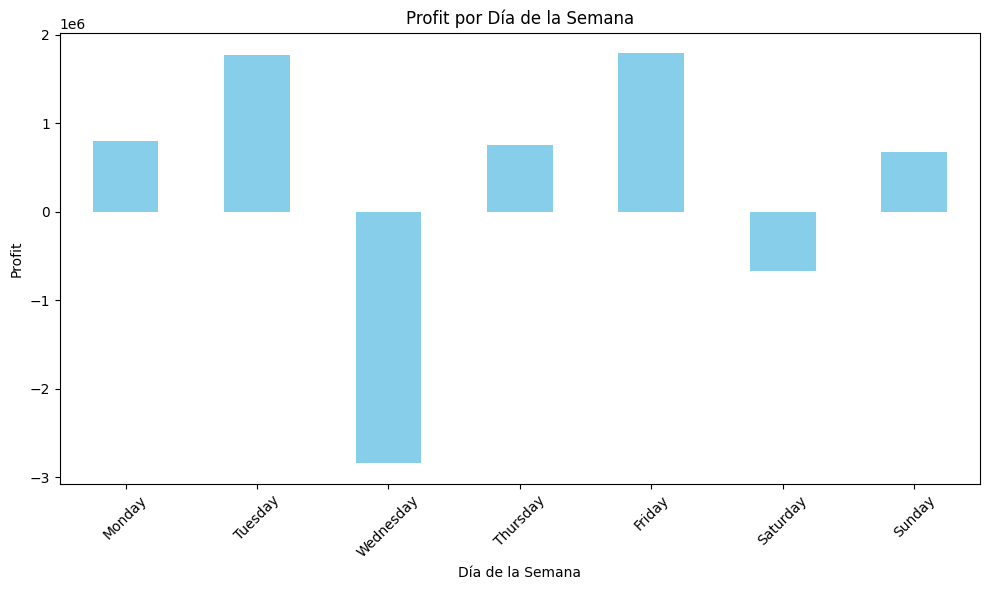

In [30]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
profit_por_dia.plot(kind='bar', color='skyblue')
plt.title('Profit por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

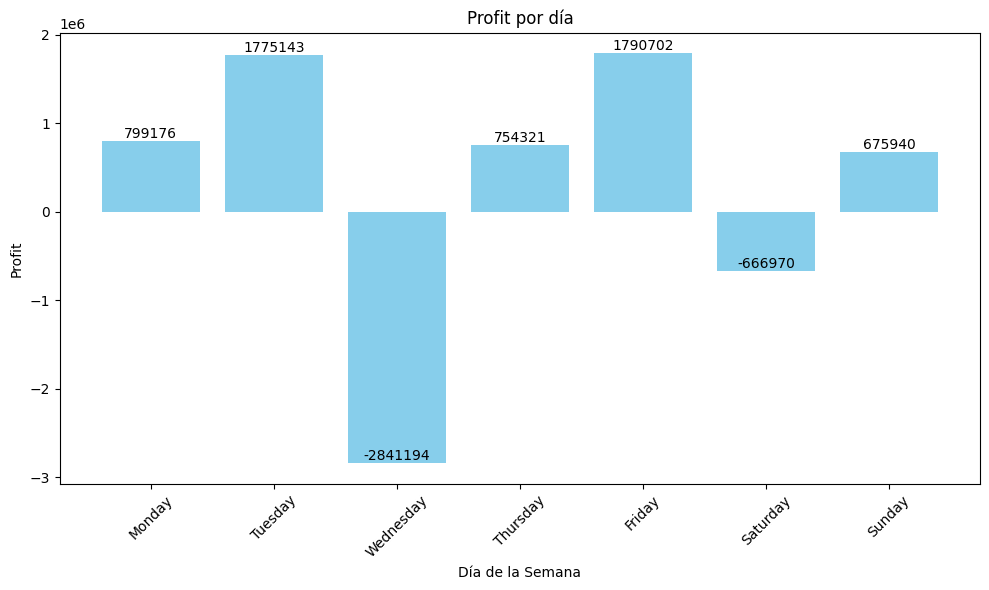

In [31]:
plt.figure(figsize=(10, 6))
bars = plt.bar(profit_por_dia.index, profit_por_dia.values, color='skyblue')

# Agregar etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Profit por día')
plt.xlabel('Día de la Semana')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
betdataset['Mes'] = betdataset['PlayDate'].dt.month_name()

In [33]:
profitbymonth=betdataset.groupby('Mes')['Profit'].sum()
profitbymonth

Mes
December     160691.04
November    2361082.78
October     -234655.55
Name: Profit, dtype: float64

In [34]:
betdataset['Hora'] = betdataset['PlayDate'].dt.hour

In [35]:
profitbyhour=betdataset.groupby('Hora')['Profit'].sum()
profitbyhour

Hora
0    -2490148.25
1      428045.96
2     -449886.81
3    -2673631.71
4     1610287.75
5      -10829.12
6     1383509.60
7    -1550688.84
8     -786425.22
9     -101877.20
10    1285277.33
11     194295.99
12   -1293609.58
13   -1030303.64
14    2385182.39
15     -36695.03
16    -358118.73
17    1827760.47
18     343390.18
19     532133.23
20     752963.31
21     829128.72
22    1123538.97
23     373818.50
Name: Profit, dtype: float64

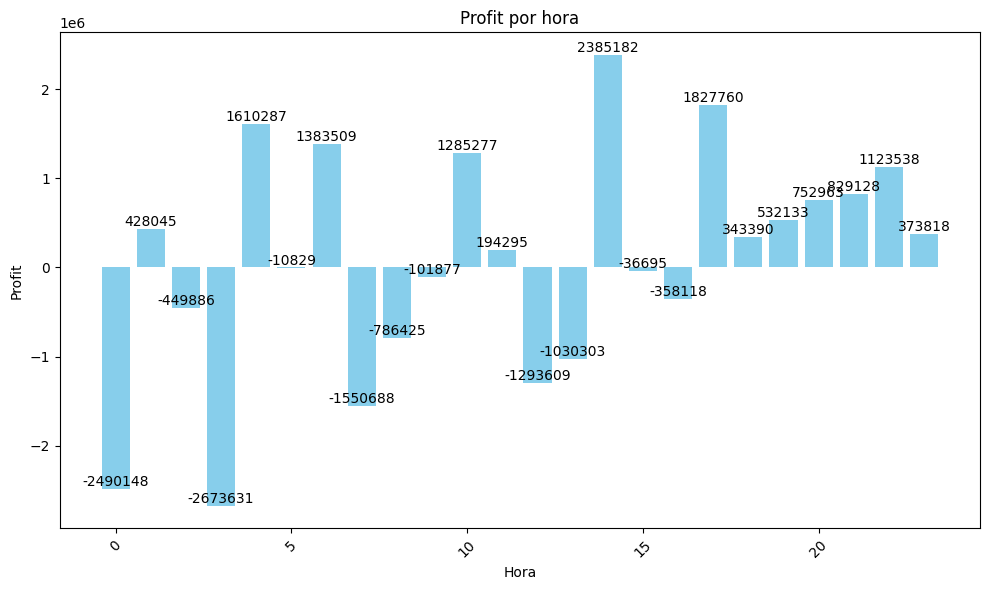

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.bar(profitbyhour.index, profitbyhour.values, color='skyblue')

# Agregar etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Profit por hora')
plt.xlabel('Hora')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result,Semana,Mes,Hora
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,1,Sunday,November,19
1,10676217,3343882,znay22,3,0.00,0.000,-3.00,1.40,2016-11-14 14:21:50+00:00,0,Monday,November,14
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,1,Wednesday,November,6
3,25732127,3429241,sanya1206,10,0.00,0.000,-10.00,1.63,2016-12-08 18:13:55+00:00,0,Thursday,December,18
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,1,Sunday,November,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,0.00,0.000,-4.00,4.80,2016-12-02 05:00:57+00:00,0,Friday,December,5
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,1,Wednesday,November,19
49997,19704592,3398419,Ferreck,1,0.00,0.000,-1.00,1.06,2016-11-29 23:48:11+00:00,0,Tuesday,November,23
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,1,Wednesday,November,12


In [39]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  50000 non-null  float64            
 5   Bonus      50000 non-null  float64            
 6   Profit     50000 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Result     50000 non-null  int64              
 10  Semana     50000 non-null  object             
 11  Mes        50000 non-null  object             
 12  Hora       50000 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(4), int32(1), int64(4), object(3)
memory usage: 4.8+ MB


In [40]:
import pylab as pl

(array([17106., 17113., 17120., 17127., 17136., 17143.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17113.0, 0, '2016-11-08'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17127.0, 0, '2016-11-22'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17143.0, 0, '2016-12-08')])

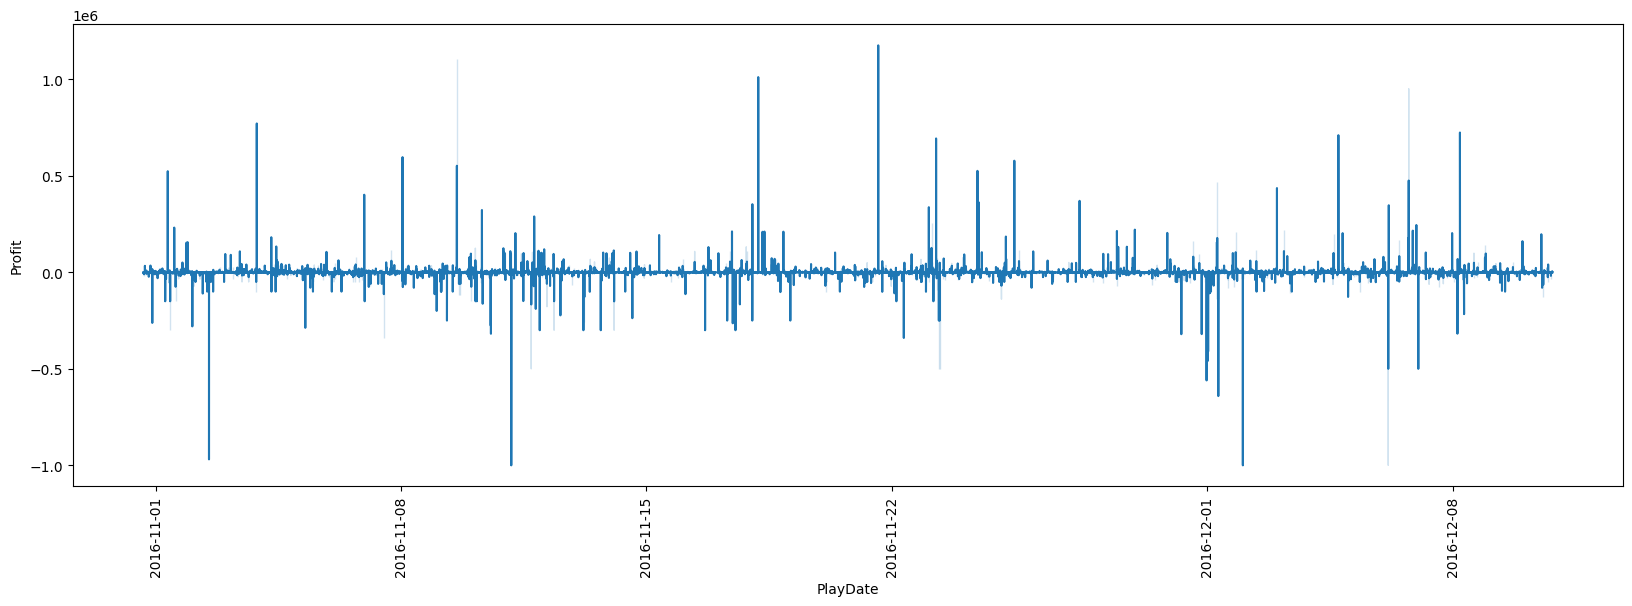

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.lineplot(data=betdataset, x="PlayDate", y="Profit")#, hue="ID")
plt.xticks(rotation=90)

In [52]:
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result,Semana,Mes,Hora
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,1,Sunday,November,19
1,10676217,3343882,znay22,3,0.00,0.000,-3.00,1.40,2016-11-14 14:21:50+00:00,0,Monday,November,14
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,1,Wednesday,November,6
3,25732127,3429241,sanya1206,10,0.00,0.000,-10.00,1.63,2016-12-08 18:13:55+00:00,0,Thursday,December,18
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,1,Sunday,November,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,0.00,0.000,-4.00,4.80,2016-12-02 05:00:57+00:00,0,Friday,December,5
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,1,Wednesday,November,19
49997,19704592,3398419,Ferreck,1,0.00,0.000,-1.00,1.06,2016-11-29 23:48:11+00:00,0,Tuesday,November,23
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,1,Wednesday,November,12


In [53]:
betdataset.columns

Index(['Id', 'GameID', 'Username', 'Bet', 'CashedOut', 'Bonus', 'Profit',
       'BustedAt', 'PlayDate', 'Result', 'Semana', 'Mes', 'Hora'],
      dtype='object')

In [50]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [54]:
delete=['Id','GameID', 'Username',  'PlayDate', 'Result', 'Semana', 'Mes', 'Hora']
cuantitativos=betdataset.columns.drop(delete)
cuantitativos

Index(['Bet', 'CashedOut', 'Bonus', 'Profit', 'BustedAt'], dtype='object')

C:\Users\andre\AppData\Local\Temp\ipykernel_15588\1089060905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
C:\Users\andre\AppData\Local\Temp\ipykernel_15588\1089060905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
C:\Users\andre\AppData\Local\Temp\ipykernel_15588\1089060905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linew

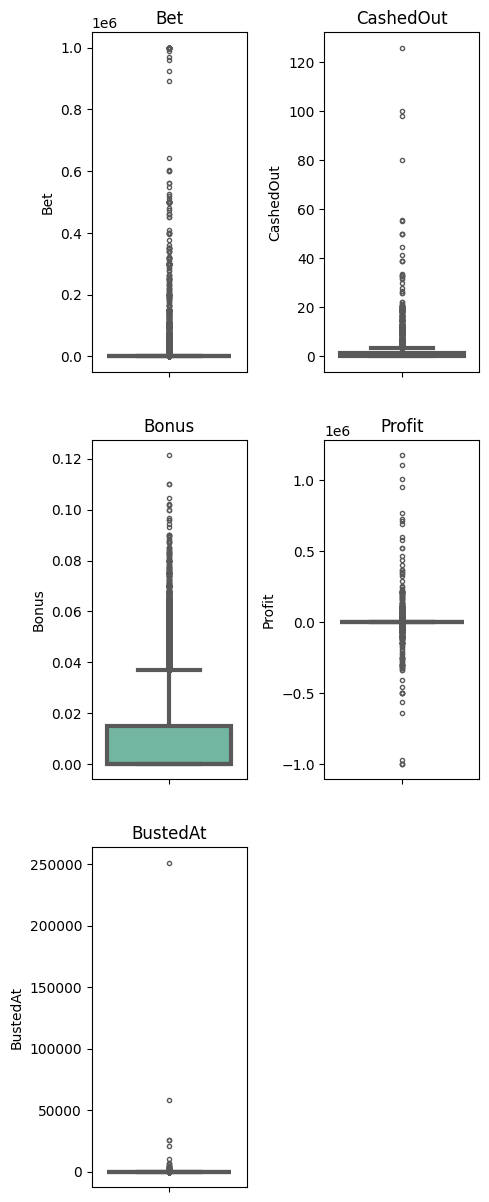

In [55]:
#Independizamos cada boxplot en su propia escala
plt.figure(figsize=(5, 15))
for i in range (len(cuantitativos)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
    plt.title(cuantitativos[i])
plt.subplots_adjust(wspace=0.5)

In [56]:
df_cuantitativos=pd.DataFrame()
for i in cuantitativos:
    df_cuantitativos[i]=betdataset[i]
df_cuantitativos

,Bet,CashedOut,Bonus,Profit,BustedAt
0,5,1.20,0.000,1.00,8.24
1,3,0.00,0.000,-3.00,1.40
2,4,1.33,0.030,1.44,3.15
3,10,0.00,0.000,-10.00,1.63
4,50,1.50,0.014,25.70,2.29
...,...,...,...,...,...
49995,4,0.00,0.000,-4.00,4.80
49996,3000,1.04,0.000,120.00,5.03
49997,1,0.00,0.000,-1.00,1.06
49998,68,1.33,0.000,22.44,19.00


<Axes: >

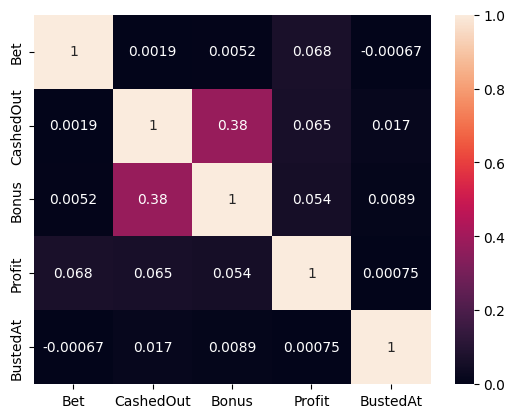

In [57]:
sns.heatmap(df_cuantitativos.corr(), annot=True)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

escaladas=betdataset
escaladas[cuantitativos]=scaler.fit_transform(betdataset[cuantitativos])
escaladas

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result,Semana,Mes,Hora
0,14196549,3366002,papai,0.000004,0.009524,0.000000,0.459561,0.000033,2016-11-20 19:44:19+00:00,1,Sunday,November,19
1,10676217,3343882,znay22,0.000002,0.000000,0.000000,0.459559,0.000006,2016-11-14 14:21:50+00:00,0,Monday,November,14
2,15577107,3374646,rrrrrrrr,0.000003,0.010556,0.247117,0.459561,0.000013,2016-11-23 06:39:15+00:00,1,Wednesday,November,6
3,25732127,3429241,sanya1206,0.000009,0.000000,0.000000,0.459556,0.000006,2016-12-08 18:13:55+00:00,0,Thursday,December,18
4,17995432,3389174,ADM,0.000049,0.011905,0.115321,0.459572,0.000009,2016-11-27 08:14:48+00:00,1,Sunday,November,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,0.000003,0.000000,0.000000,0.459558,0.000019,2016-12-02 05:00:57+00:00,0,Friday,December,5
49996,1461408,3302415,Sandboxx,0.002999,0.008254,0.000000,0.459615,0.000020,2016-11-02 19:01:58+00:00,1,Wednesday,November,19
49997,19704592,3398419,Ferreck,0.000000,0.000000,0.000000,0.459560,0.000004,2016-11-29 23:48:11+00:00,0,Tuesday,November,23
49998,20075463,3400278,ugneri,0.000067,0.010556,0.000000,0.459571,0.000076,2016-11-30 12:29:56+00:00,1,Wednesday,November,12


In [60]:
escaladas=pd.DataFrame()
for i in cuantitativos:
    escaladas[i]=betdataset[i]

In [61]:
#Se identifican las posiciones de los datos atípicos
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean')
# OJO, usar un número de vecinos más cercano con números impares.

Filtrado = LOF.fit_predict(escaladas) # Se realiza la predicción de los datos atípicos

NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(escaladas), dtype = int)
# Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [62]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [1 1 1 ... 1 1 1]
Factores atípicos negativos:  [-1.2453087  -1.         -1.1280208  ... -1.         -1.01648643
 -0.95878274]
Número de muestras o filas con datos atípicos:  7510


In [63]:
#Porcentaje de datos atípicos
porcentajeatipicos= 100*n_errors/betdataset.shape[0]
porcentajeatipicos
print(f"El porcentaje de datos atípicos es de {(round(porcentajeatipicos,3))} %")

El porcentaje de datos atípicos es de 15.02 %
